In [1]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line

def load_data_from_file(fileName = "dataset/advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  # **************** your code here ****************
  ones_column = np.ones((features_X.shape[0], 1))
  features_X = np.hstack((ones_column, features_X))


  return features_X, sales_Y


In [2]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [4]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
  # **************** your code here ****************
  return [generate_random_value(bound) for _ in range(n)]


In [5]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [6]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    # **************** your code here ****************
    loss = compute_loss(individual)
    fitness_value = 0
    if loss != 0:
        fitness_value = 1 / loss
    else:
        fitness_value = float('inf')
    return fitness_value

In [7]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0186001912541925e-06


In [8]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
   # **************** your code here ****************
    for i in range (len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i], individual2_new[i] = individual2[i], individual1[i]
    return individual1_new, individual2_new

In [9]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [10]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    # **************** your code here ****************
    individual_m = individual.copy()
    return [1 - val if random.random() < mutation_rate else val for val in individual_m]

In [11]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [12]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [13]:
population = initializePopulation(100)
print(len(population))

100


In [14]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [15]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[0.8084938159408039, -3.4359693991699123, 3.9767531415020563, 4.4567839149561514]


In [16]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        # **************** your code here ****************
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)


        # crossover
        # **************** your code here ****************
        individual1, individual2 = crossover(individual1, individual2)

        # mutation
        # **************** your code here ****************
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)

        new_population.append(individual1)
        new_population.append(individual2)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        # **************** your code here ****************
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [17]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [18]:
def run_GA():
  n_generations = 100
  m = 600
  global features_X, sales_Y
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    # *********** your code here *************
    population, loss = create_new_population(population)
    losses_list.append(loss)
    print("Best loss: ", loss, "with chromosome: ", population[m-1])

  return losses_list, population



Best loss: 2326.1764485526114 with chromsome:  [0.022221826851781534, -0.13321941847678542, -1.8547606082321588, 1.839217394712661]
Best loss:  2326.1764485526114 with chromosome:  [0.022221826851781534, -0.13321941847678542, -1.8547606082321588, 1.839217394712661]
Best loss: 858.3058649582536 with chromsome:  [-1.2552910171795084, 0.207210559493618, 0.1624794871665125, 0.24544721926738977]
Best loss:  858.3058649582536 with chromosome:  [-1.2552910171795084, 0.207210559493618, 0.1624794871665125, 0.24544721926738977]
Best loss: 858.3058649582536 with chromsome:  [-1.2552910171795084, 0.207210559493618, 0.1624794871665125, 0.24544721926738977]
Best loss:  858.3058649582536 with chromosome:  [-1.2552910171795084, 0.207210559493618, 0.1624794871665125, 0.24544721926738977]
Best loss: 853.0867198108998 with chromsome:  [1.4296876569411754, -0.10291089798272535, -0.7613170543158976, 1.112890902381699]
Best loss:  853.0867198108998 with chromosome:  [1.4296876569411754, -0.10291089798272535

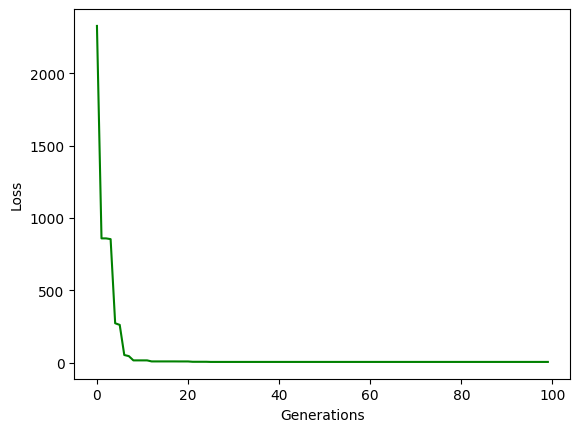

In [19]:
def visualize_loss(losses_list):
    # *********** your code here *************
    plt.plot(losses_list, color="green")
    plt.xlabel("Generations")
    plt.ylabel("Loss")
    plt.show()
    
# Now capture population from run_GA and pass it to visualize_predict_gt
losses_list, population = run_GA()
visualize_loss(losses_list)

Best individual: [1.923506941042633, 0.0681316798478615, 0.1624794871665125, -0.025912205269017496]


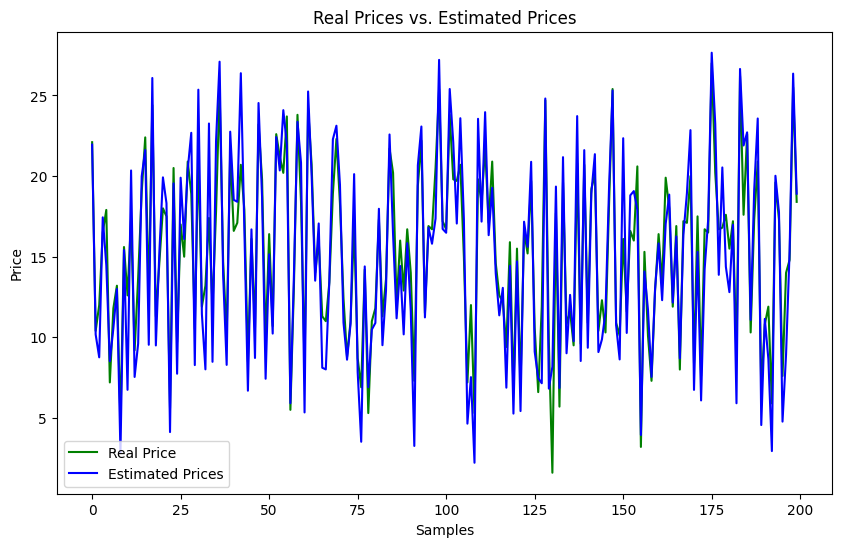

In [20]:
# Adjusting the visualize_predict_gt function to take population as an argument
def visualize_predict_gt(population, features_X, sales_Y):
    sorted_population = sorted(population, key=compute_fitness)
    best_individual = sorted_population[-1]
    print("Best individual:", best_individual)

    theta = np.array(best_individual)
    
    estimated_prices = []
    for feature in features_X:
        estimated_price = np.dot(feature, theta)
        estimated_prices.append(estimated_price)
    estimated_prices = np.array(estimated_prices)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel("Samples")
    plt.ylabel("Price")
    plt.plot(sales_Y, c="green", label="Real Price") 
    plt.plot(estimated_prices, c="blue", label="Estimated Prices")
    plt.legend()
    plt.title("Real Prices vs. Estimated Prices")
    plt.show()

visualize_predict_gt(population, features_X, sales_Y)

[1.923506941042633, 0.0681316798478615, 0.1624794871665125, -0.025912205269017496]


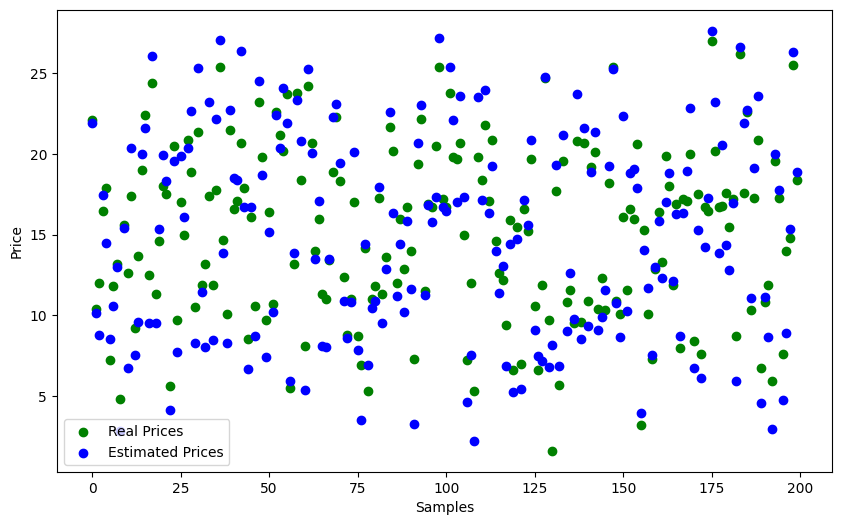

In [21]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()